In [ ]:
!pip install scapy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 42.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from scapy.all import IP, TCP


In [ ]:
# Simulate packet data
def generate_packet_data(num_packets=100):
    packets = []
    for _ in range(num_packets):
        src_ip = f"192.168.1.{random.randint(1, 255)}"
        dst_ip = f"192.168.1.{random.randint(1, 255)}"
        packet_type = random.choice(["normal", "attack"])  # Simulating normal and attack packets
        packets.append({"src_ip": src_ip, "dst_ip": dst_ip, "type": packet_type})
    return pd.DataFrame(packets)

# Generate a simulated dataset of packets
packet_data = generate_packet_data(1000)
packet_data.head(30)  # Display the first 30 rows


,src_ip,dst_ip,type
0,192.168.1.101,192.168.1.59,normal
1,192.168.1.84,192.168.1.228,normal
2,192.168.1.106,192.168.1.205,attack
3,192.168.1.12,192.168.1.102,normal
4,192.168.1.98,192.168.1.32,attack
5,192.168.1.154,192.168.1.233,attack
6,192.168.1.165,192.168.1.87,attack
7,192.168.1.38,192.168.1.57,normal
8,192.168.1.247,192.168.1.177,normal
9,192.168.1.151,192.168.1.84,attack


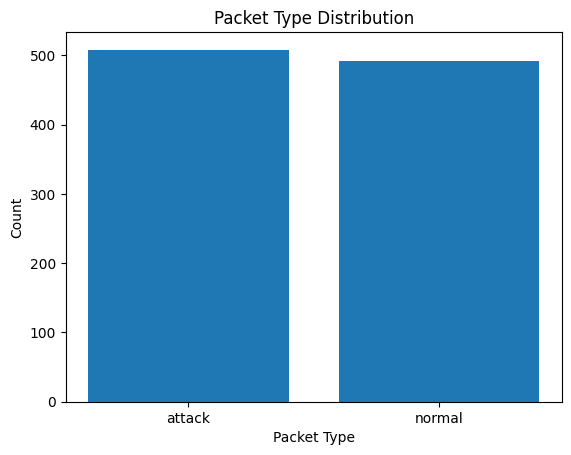

Percentage of attack packets: 50.80%


In [ ]:
# Count occurrences of each type
attack_counts = packet_data['type'].value_counts()

# Plotting the results
plt.bar(attack_counts.index, attack_counts.values)
plt.title('Packet Type Distribution')
plt.xlabel('Packet Type')
plt.ylabel('Count')
plt.show()

# Display percentage of attack packets
attack_percentage = (attack_counts['attack'] / len(packet_data)) * 100
print(f"Percentage of attack packets: {attack_percentage:.2f}%")


In [ ]:
# Simulate detailed packet data with attack types
def generate_detailed_packet_data(num_packets=100):
    packets = []
    attack_types = ["DDoS", "Port Scan", "Malware", "Phishing"]

    for _ in range(num_packets):
        src_ip = f"192.168.1.{random.randint(1, 255)}"
        dst_ip = f"192.168.1.{random.randint(1, 255)}"
        if random.random() < 0.2:  # 20% chance of an attack
            packet_type = random.choice(attack_types)
        else:
            packet_type = "normal"
        packets.append({"src_ip": src_ip, "dst_ip": dst_ip, "type": packet_type})

    return pd.DataFrame(packets)

# Generate detailed packet data
detailed_packet_data = generate_detailed_packet_data(1000)
detailed_packet_data.head()  # Display the first few rows


,src_ip,dst_ip,type
0,192.168.1.115,192.168.1.27,normal
1,192.168.1.93,192.168.1.139,normal
2,192.168.1.83,192.168.1.108,normal
3,192.168.1.94,192.168.1.255,normal
4,192.168.1.80,192.168.1.40,Phishing


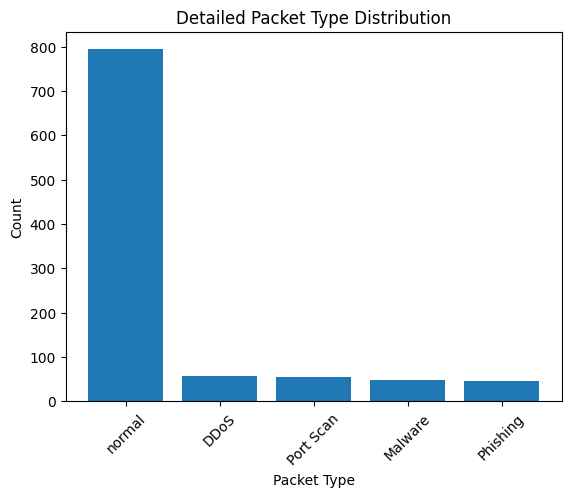

Percentage of DDoS packets: 5.70%
Percentage of Port Scan packets: 5.40%
Percentage of Malware packets: 4.90%
Percentage of Phishing packets: 4.60%


In [ ]:
# Count occurrences of each detailed attack type
attack_counts = detailed_packet_data['type'].value_counts()

# Plotting the results
plt.bar(attack_counts.index, attack_counts.values)
plt.title('Detailed Packet Type Distribution')
plt.xlabel('Packet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display percentage of each attack type
for attack in attack_counts.index:
    if attack != 'normal':
        attack_percentage = (attack_counts[attack] / len(detailed_packet_data)) * 100
        print(f"Percentage of {attack} packets: {attack_percentage:.2f}%")
